In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Breast-Cancer.csv')

In [3]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.shape

(569, 33)

In [6]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [7]:
df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [8]:
features=df.drop(columns=['diagnosis'])

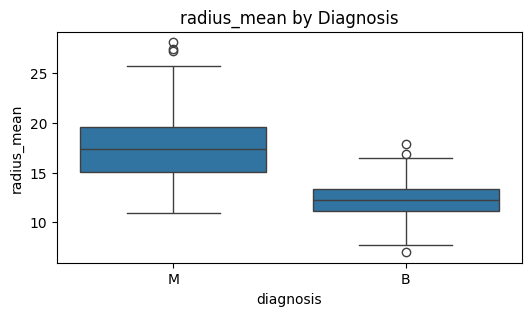

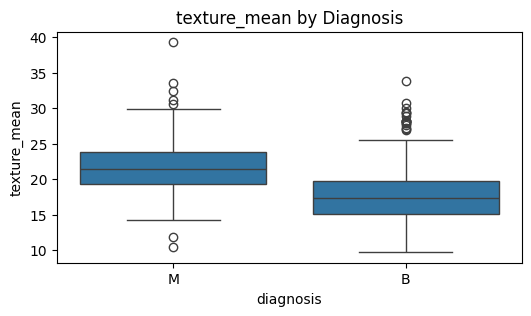

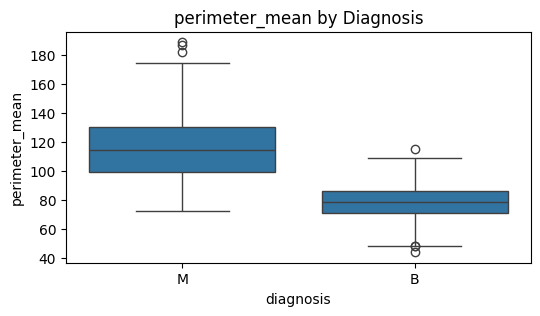

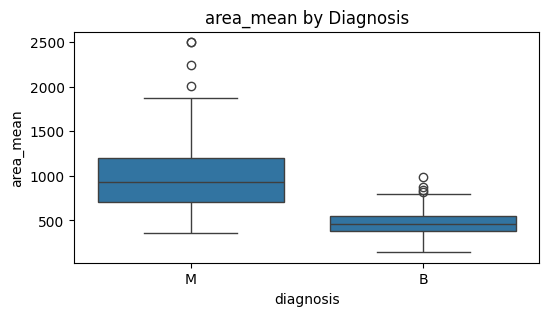

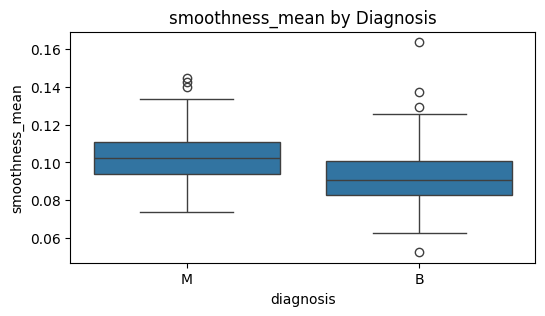

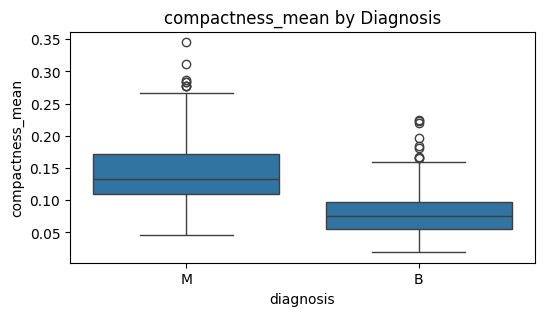

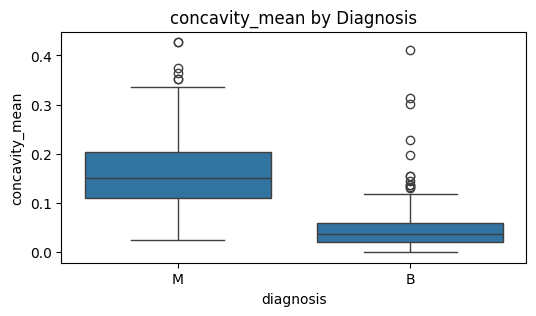

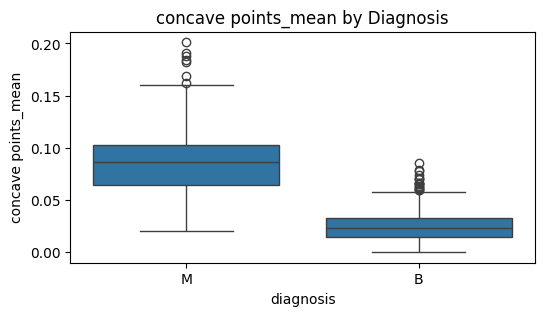

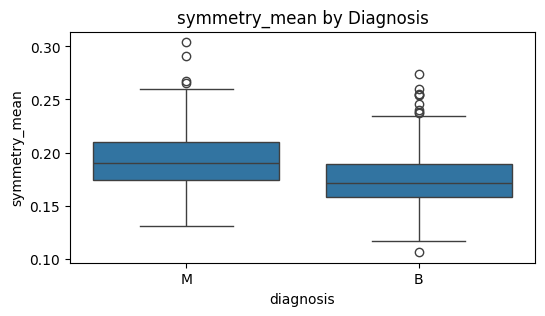

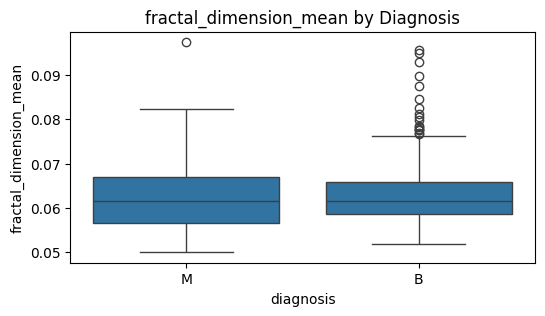

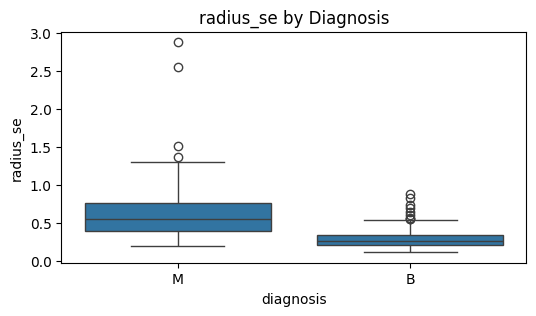

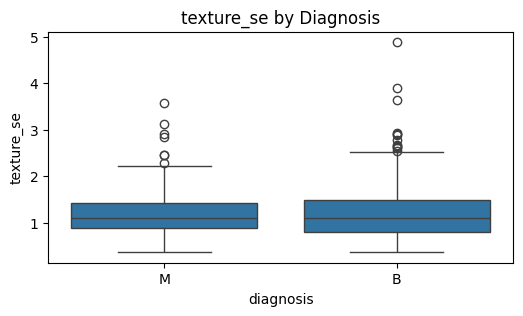

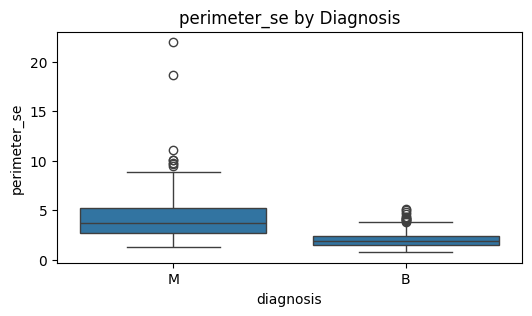

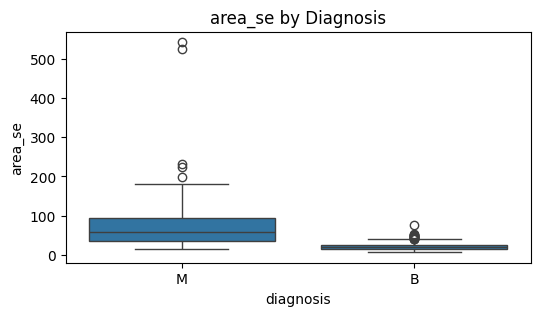

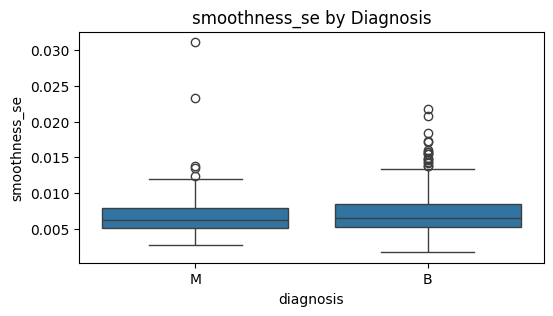

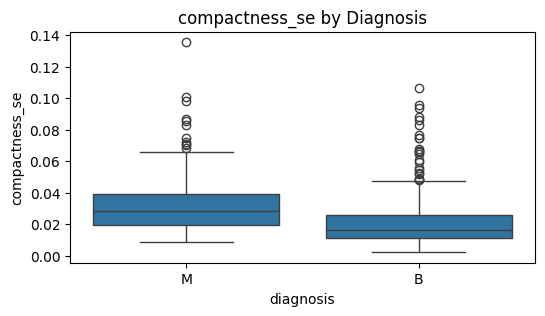

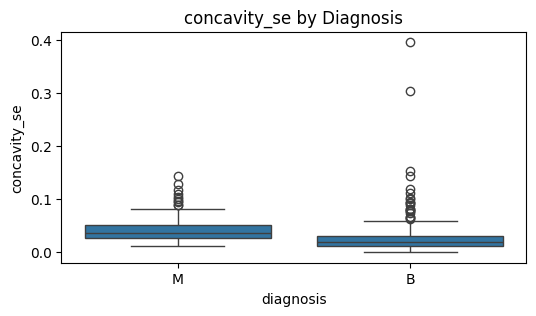

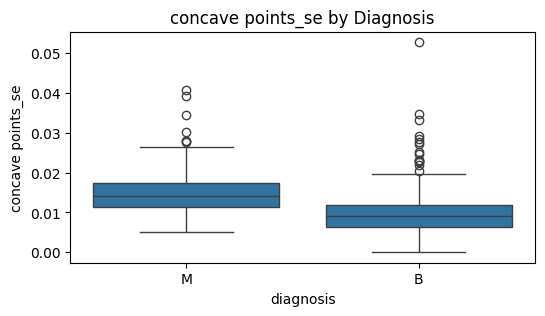

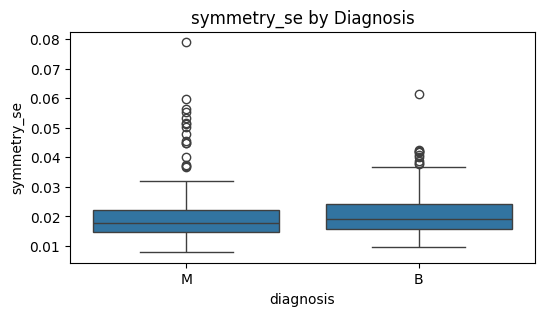

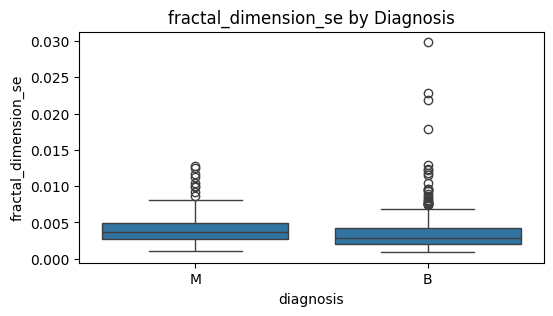

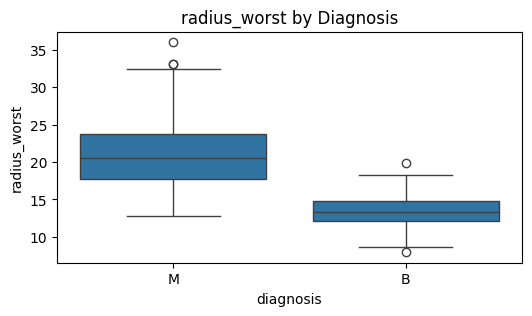

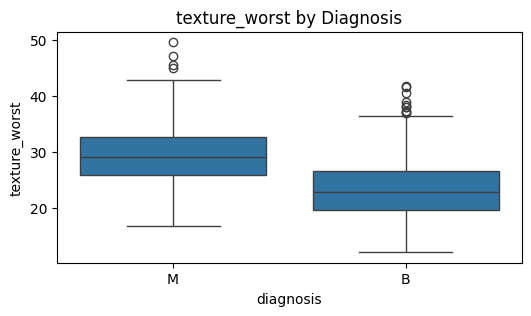

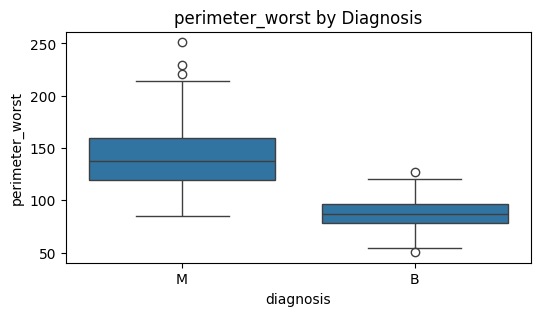

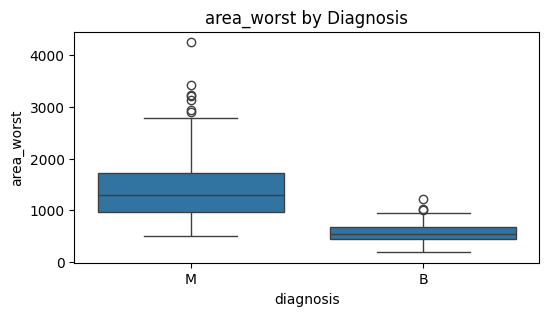

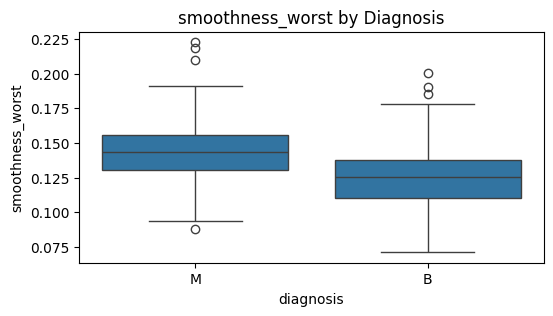

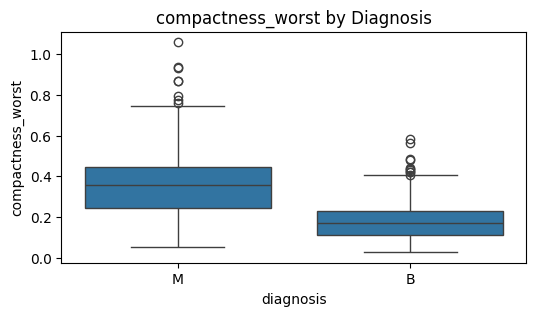

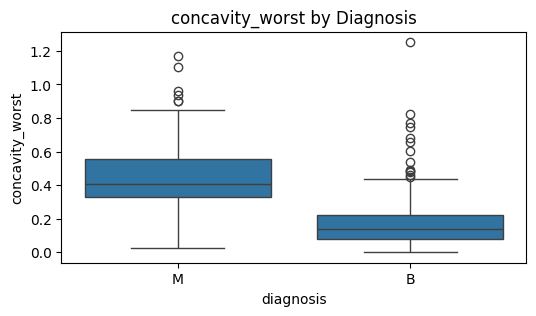

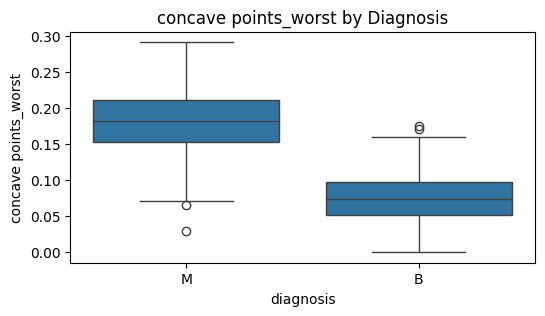

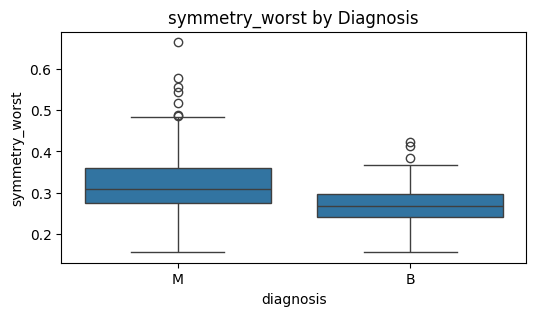

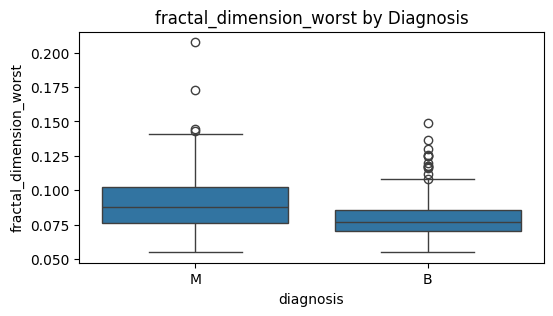

In [9]:
for col in df.columns[1:]:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='diagnosis', y=col, data=df)
    plt.title(f"{col} by Diagnosis")
    plt.show()

In [10]:
df = df[~((df['diagnosis'] == 'B') & (df['smoothness_mean'] > 0.14))]

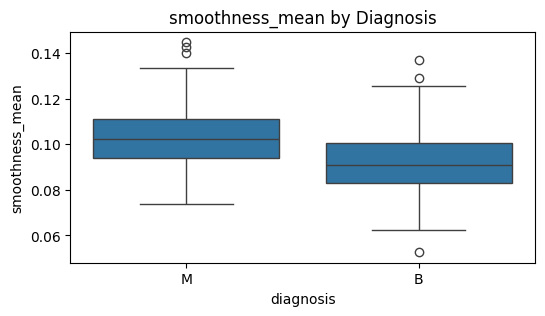

In [11]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='diagnosis', y='smoothness_mean', data=df)
plt.title("smoothness_mean by Diagnosis")
plt.show()

In [12]:
df = df[~((df['diagnosis'] == 'B') & (df['concavity_mean'] >= 0.18))]

In [13]:
# Drop the highest 'fractal_dimension_mean' value in malignant
idx_to_remove = df[df['diagnosis'] == 'M']['fractal_dimension_mean'].idxmax()
df = df.drop(index=idx_to_remove)

In [14]:
idx_to_remove = df[df['diagnosis'] == 'B']['texture_se'].idxmax()
df = df.drop(index=idx_to_remove)

In [15]:
df = df[~((df['diagnosis'] == 'M') & (df['smoothness_se'] >= 0.02))]

In [16]:
df = df[~((df['diagnosis'] == 'M') & (df['compactness_se'] >= 0.12))]

In [17]:
df = df[~((df['diagnosis'] == 'B') & (df['concavity_se'] >= 0.2))]

In [18]:
df = df[~((df['diagnosis'] == 'B') & (df['concave points_se'] >= 0.04))]

In [19]:
idx_to_remove = df[df['diagnosis'] == 'M']['symmetry_se'].idxmax()
df = df.drop(index=idx_to_remove)

In [20]:
idx_to_remove = df[df['diagnosis'] == 'B']['symmetry_se'].idxmax()
df = df.drop(index=idx_to_remove)

In [21]:
df = df[~((df['diagnosis'] == 'B') & (df['concavity_worst'] > 1))]

In [22]:
df = df[~((df['diagnosis'] == 'M') & (df['concave points_worst'] < 0.05))]

In [23]:
idx_to_remove = df[df['diagnosis'] == 'B']['fractal_dimension_worst'].idxmax()
df = df.drop(index=idx_to_remove)

In [24]:
df.shape

(554, 31)

In [25]:
df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [26]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,348
M,206


In [27]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [28]:
x=df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [40]:
X_train_scaled = scaler.fit_transform(x_train)  # fit on training data only
X_test_scaled = scaler.transform(x_test)        # transform test using training stats

In [41]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [42]:
y_pred=model.predict(X_test_scaled)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

Accuracy: 0.972972972972973
Confusion Matrix:
 [[70  0]
 [ 3 38]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        70
   Malignant       1.00      0.93      0.96        41

    accuracy                           0.97       111
   macro avg       0.98      0.96      0.97       111
weighted avg       0.97      0.97      0.97       111



In [45]:
model.classes_


array([0, 1])

In [46]:
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

In [47]:
from sklearn.metrics import precision_score, recall_score

for t in [0.3, 0.4, 0.5, 0.6]:
    y_pred = (y_pred_prob >= t).astype(int)
    print(f"Threshold: {t}")
    print("Recall:", recall_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))

Threshold: 0.3
Recall: 0.975609756097561
Precision: 1.0
Threshold: 0.4
Recall: 0.9512195121951219
Precision: 1.0
Threshold: 0.5
Recall: 0.926829268292683
Precision: 1.0
Threshold: 0.6
Recall: 0.8780487804878049
Precision: 1.0


In [48]:
#as recall is already 1 we dont need to change our treshold value
#treshould value is the probability limit we decide if more than that we can say it is 1 and for less than that we say 0.

In [49]:
from sklearn.metrics import precision_recall_curve
y_probs = model.predict_proba(X_test_scaled)[:, 1]


In [52]:
print(y_probs[0:3])  # probability of class 'M'

[9.99999957e-01 2.53107363e-02 2.28097538e-05]


In [53]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs, pos_label='M')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


In [54]:
print(y_test.value_counts())

diagnosis
0    70
1    41
Name: count, dtype: int64
